In [1]:
import Pkg; Pkg.activate("C:/Users/s151781/AppData/Local/Julia-1.3.1/GN/Project.toml")
using Revise
using Distributions
using PyPlot
using FFTW
using Compat
using WAV
using DSP
using Base64
using ForneyLab
using LinearAlgebra
using ProgressMeter
using Distributed

include("../functions/auxiliary/audioplayer.jl")
include("../functions/auxiliary/workflow.jl")
include("../functions/auxiliary/fourier.jl")
include("../functions/auxiliary/visualization.jl")
include("../functions/auxiliary/buffer.jl")
include("../functions/preprocessing.jl")
include("ARFB_fast_cossin.jl")

Activating environment at `C:\Users\s151781\AppData\Local\Julia-1.3.1\GN\Project.toml`


In [2]:
# load speech data
xi, fs = wavread("../data/airco.wav", format="native")
fs = Int(fs)
xi = convert(Array{Float64,1}, xi[1*fs:4*fs])

# pre-process signals
yi = preprocess(xi, fs) 

N = length(yi)
t = collect(1:N)/8000
fs = 8000

audioplayers(yi, fs=8000);

<source src="data:audio/wav;base64,UklGRkB3AQBXQVZFZm10ICgAAAD+/wEAQB8AAAB9AAAEACAAFgAgAAAAAAADAAAAAAAQAIAAAKoAOJtxZGF0YQR3AQCsZgw+p76QPi+woD5FjbU+F4u1PmTHzD58EOo+RkkDP68iDT9uSgM/fvvdPlgozT5cGbw+RErRPjlKzz6kJMc+/Q6YPlbLjz4wAJI+jjquPnVEmD4Qyns+m7mBPu+gBj7PAi8+AvwiPq5FVbyWY0G+Eud+vkwLKL4wNr85DNvOPfZu+7sP6c69oz08vs+tA74t2Dy9eZkNviFKLL5ECIC+q0LNvqfC5b5Zjui+GfqSvv1emb6PMni+uFKbvmhQt74yJL6+ikftvhtDBr8ujP6+lfYJv2A/9b5XacS+GX5yvmTGZL6xk5e+wR6PvuE2b76Ga1q+SvO7vT1nVr11UFy8VkvKvUDbjL5KjKS+T/FbvjGhaL2sHnA9oNyhPOYblL1og6K9tQaLPXjsbT5OOmQ+F48+PhKelD3HVfY8o/CAPtUi6T6Dvwc/OIbcPoggnT5RuK8+w6H9Ph88Ij989Ck/23IKPzeTFz+YjSE/bmE1PwnEKj+sowg/Uuz1PsDU6T5DwOg+nP3pPr6Cvj5Cgoo+hlqKPi4JvT6BIas+3g4pPgaRn7xMnB+9BJymPIs87z2VFO88IIYDvvreq75+uta+bsyzvt3aUL4bgF2+tKCkvgnXyL7krOC+QlDsvh+F3b5x2dy+I3HVvpRRvb6sbre+smyqvpQjtr7owIG+i5h4vrJLg77gIl++vn9uvuAAg77KJVC+66iFvsqAhb4x/nq+lhJ7vjaVQb6xLQ2+7wOJvovf/L4zAhi/5d4Jv7PZ177oUIe+F1FVvmVAYL752bm+20e/vm6VuL6UrKq+2WhpvmVBCr6o8yK+OJTQvUN8iL3q7Ym9ercsObeKLj7VaaI+df7CPvLdxT6+QZs+XtOZPlMHxj7qcAM/EgUlP2GFKT8w7RA/rET/PqVrAD/1UiE/E9VCPxHIKj+7BAg/82e7PkFFoz6oZ64+yx/4Pg2PMz+hCD8/Du4wPxBoCj+4fQA/JpHePr1n7D7AbNY+HsKbPiyQbT6c8UE+O0s2PlYJBT4rWd48ToyNvQ4TXL4sFm++ZuFvvlNlhr6S67K+P4wBv9dSIr8xJB6/0SEKv3/U8r4obQe/tAEev1yMOb+3/TG/tyYav1L7G79Snye/x1QSv8OkB7+CguK+OvXevooz275V7dW++ca5vmGdkL7H1pS+glSIvrAVYL5yEzy+aPk2vskKJL7iCzK+3U26vRPsRL5oW9K9tG6VPR5TpT2+gvs8RejvvZV7QL0/p2C9GlCNuBxCTD6Wj2o+2+eJPT/sbLy42TU95K9hPpgkvz7Ak+o+7bLjPiDhqz6PC7o+hYDKPqPM2z5Ba9U+yNrNPvZPtj40C5c+uD1+PuIVrj5427g+/orWPtdH0T7xxbo++fWPPjZRRT4kjKs9JbY8PuGsfz6/dLE+iIqnPl1qSj5atfE9UDWfPejhaz4RXq4+F/y7PnfrqD7Q+JY964jPPO/Ppj2WOrs9pW+CPYvAtrw+PTO9kaN7vWUy2rvDab084jUSvQY1Eb771lG+XdBdvse2KL7gc02+Q8LmvhYNA7+QMBW/FDANv882877uVQq/srosvx/SS78Erjy/GBEtv1ZFFr/8I/m+TB4Sv4xBD79a9f++CrGUvuUKQr5JOE2+eVQovuOR+b2kCP67IT2iPcQ4xj3j4909DnskPq+xkT4wMqA+VN99PrbBIj4cPaU9kK59PXLCmT5NVb4+A1a7PipelD6yua89crFKPXwPlD3RfYg+Ce6kPrTzfT67618+kA+KPj38nT5Sr7s+e+LWPtgGyz53xas+76onPlc0lD64V7s+In7cPkgVzj4yWKw+z4V+Pnk/eT4WCpE+LL+FPqlsbT75nyI+k9b1Pa8uID4Q0/49D/MJPjCWEj7GOc09Eyi1Pb4mRz10XnI97HrRPLWLq712iwm+ecnIvUq8kr1v+Cy9b5WQu9T99b1uI06+HMJzvovfWb5lrdm97A89vrIIq752dty+W4Lmvj9qB78jugK/u54Bv19iA7+iXQO/O/UUv/zrKL+K8FO/9IxtvyIzXL/lkU2/HD8vv7y6Hr8zxxa/GikUv2GHAL9POdG+XBKgvsUmOL4dWvC9fc7JvXROxj1h8m8+dFDDPly4AD+IOOA+F5uzPi1MtT4ROsw+JcLyPgOiHz94uyM/GfgSPxwk8j7hW+U+awwTP3hyHz+QHhI/22z/PlNZ2z420fY+smEOPygnCD+UMPg+Kh+/PglKtz40bK4+uJXAPi1owj7IDqY+kICOPsJyoj7tXLI+N3CsPvXhaD7y/UI+B+VlPmvghT6AyKc+bbuHPnM3Kj6FV7y6cNrIvb8bjL2AwCG+phRlvh26ib51taa+B3NqvjZzVb7uFo6+cxjevvsaFL/+Awy/tXP/vuoBB78QZxq/T2Uuv6hiH7/h3AC/a9Sovsu/iL6Z18i+AtUNv2YJHL8C1AO/RKO/vob3pr71DZW+FI2cvvO6o76hNUi+cJo3vpUyQ778jBq+ryHbvQ7bjb1Osk69w8+qva5wTb6J5k2+FqBDvVhb9j0IUFM+eo34PWXp2j0wRdI8PQYIPgOVHj68EIA90kVLPdSodj3A9zM+suOOPltQoT6oNpc+gT+mPs62xj7RP/k+rPcZP/6mIj8ECwQ/64HmPpdH7j58tc4+MK4KP+TX8z4jw+A+saUEP1OMDz+u0Ac/TNYIP9r0Gz9FXgc/jMXxPm9jzT4kZZs+FJCUPscHtT4d3a0+slNVPjSIwz0zyTO89VQFvrfLBL4qo4K+rnB0vq4ok74Vx6K+YZ/MvmIbFL/4USe/+BUVv8PhAb9dAgi/76Ukv8W7Vb/932q/ilhjv+32Q7+G1g+/PhMGv7To/L7jPfC+p0rzvv5b4b4EtcW+Kbfmvgips75cvYq+xKQHvi/Ohb053tO998hNvnaxbL72Qxq+TkGHPd/9ZD2J+x+937vIvZFza72C9F09IJtRPjzxbT4hXD8+GkAlPiUEaT4V2Yo+4+LNPoyl9z7betQ+asvHPqNKzD7MFtc+ePubPqgbXD55QMs9T+9XPtQFuz57tP4+5MThPmnYmD6BXSA+pwFCPlCsuD6vheg+pdvpPgZg9z5tnOQ+1CwUP9i7Fj/IEBg/0In8PuWLuj4OW5w+UGe3PqxC9T4xtA0/PqX6Pshypz4boz8+uT4GPmCwJT7J0So+zHbpPa1U+bydbaC98b4Qvrx62LziwwA9SLpsPI2P7r09Xny+3ty6vnvNBr89JBi/+q0ev2XjF797XiK/zWwUv3HdC78UFRe/GJISv6QXDL9J8h2/eagmv4zaKL/j+y2/Z+pOv5aSTL8fpjK/R3stv8qqGb9rCPu+qY/vvu9Dxr5cV8u+/R7ivuJvrb49G56+E9WOvjexVr6h5VG+D03OvbuhuDwp4e49VzpuPi48gT5nF5Q+n5yVPjp8hD7dd6Y+Ala/PnT9rD7gIro+VS2xPvoDmT721s8+jgfIPgXD0T70Hrs+ubiaPki7NT46eg4+1SNHPeOkPj4XwZM+oWbEPlMMqz6hzmg+64OPPnTJuT4w3cE+p9GMPo+9Fz7qHm88unRmPnvJ4D4YWBU/g6MJP5Kzrz7VjAY+mhqHPX8z+j1Yv5s+U16iPrAzVD5Gtim9TB80vpdW7r2WfG89XDm9PU0cJL31fBK+P+Jivn3pnb7o7a2+RT/Cvs2M8b7PQAy/tBr2vuY+777ZjM++CRvKvmbB5b7RTOK+zl/3vlBWAb+n6/G+ZjX0voqMx76IPIq+gxBZvnLeKL5O8Ui+zOVDvvpFHTyyk4E+SHvTPvSpoz7SnBo+L+HzPHd+uTzrcCU+aBuhPp1Psj45tqw+87w/Pr1t8z29O4A+bZe+Pt6c2j6x0

In [3]:
f = collect(0:fs/50:fs/2)
bufsize = length(f)

# create fg
eval(generateARFB(length(f), bufsize))
ForneyLab.draw(fg)

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.38.0 (20140413.2041)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 14892833319955508309 -->
 14892833319955508309 
 
 placeholder_b_γ 
 
<!-- 9514250873074579424 -->
 9514250873074579424 
 
 placeholder_Σ_smin 
 
<!-- 9431019872221617493 -->
 9431019872221617493 
 
 placeholder_Σ_x 
 
<!-- 14972098552206215803 -->
 14972098552206215803 
 
 placeholder_y 
 
<!-- 12336375523388681365 -->
 12336375523388681365 
 
 𝒩 
 gaussianmeanvariance_3 
 
<!-- 14972098552206215803--12336375523388681365 -->
 14972098552206215803--12336375523388681365 
 
 y 
 1 out 
 1 out 
 
<!-- 4508065191040162760 -->
 4508065191040162760 
 
 placeholder_c 
 
<!-- 11118361935442720366 -->
 11118361935442720366 
 
 placeholder_Σ_θ 
 
<!-- 117939052457574909 -->
 117939052457574909 
 
 𝒩 
 gaussianmeanvariance_1 
 
<!-- 117939052457574909--9514250873074579424 -->
 117939052457574909--9514250873074579424 
 
 Σ_smin 
 1 out 
 3 v 
 
<!-- 4812661435263951711 -->
 4812661435263951711 
 
 placeholder_μ_smin 
 
<!-- 117939052457574909--4812661435263951711 -->
 117939052457574909--4812661435263951711 
 
 μ_smin 
 1 out 
 2 m 
 
<!-- 5489219660430462525 -->
 5489219660430462525 
 
 placeholder_μ_θ 
 
<!-- 8014148462401949222 -->
 8014148462401949222 
 
 AutoregressiveFilterbank 
 autoregressivefilterbank_1 
 
<!-- 8014148462401949222--117939052457574909 -->
 8014148462401949222--117939052457574909 
 
 smin 
 1 out 
 2 x 
 
<!-- 2464632379303228648 -->
 2464632379303228648 
 
 GammaVector 
 gammavector_1 
 
<!-- 8014148462401949222--2464632379303228648 -->
 8014148462401949222--2464632379303228648 
 
 γ 
 1 out 
 4 γ 
 
<!-- 3485117852727008191 -->
 3485117852727008191 
 
 𝒩 
 gaussianmeanvariance_2 
 
<!-- 8014148462401949222--3485117852727008191 -->
 8014148462401949222--3485117852727008191 
 
 θ 
 1 out 
 3 θ 
 
<!-- 15934860337127928147 -->
 15934860337127928147 
 
 placeholder_a_γ 
 
<!-- 12336375523388681365--9431019872221617493 -->
 12336375523388681365--9431019872221617493 
 
 Σ_x 
 1 out 
 3 v 
 
<!-- 2349426195822922643 -->
 2349426195822922643 
 
 × 
 multiplication_1 
 
<!-- 12336375523388681365--2349426195822922643 -->
 12336375523388681365--2349426195822922643 
 
 x 
 1 out 
 2 m 
 
<!-- 2349426195822922643--4508065191040162760 -->
 2349426195822922643--4508065191040162760 
 
 c 
 1 out 
 3 a 
 
<!-- 2349426195822922643--8014148462401949222 -->
 2349426195822922643--8014148462401949222 
 
 s 
 1 y 
 2 in1 
 
<!-- 2464632379303228648--14892833319955508309 -->
 2464632379303228648--14892833319955508309 
 
 b_γ 
 1 out 
 3 b 
 
<!-- 2464632379303228648--15934860337127928147 -->
 2464632379303228648--15934860337127928147 
 
 a_γ 
 1 out 
 2 a 
 
<!-- 3485117852727008191--11118361935442720366 -->
 3485117852727008191--11118361935442720366 
 
 Σ_θ 
 1 out 
 3 v 
 
<!-- 3485117852727008191--5489219660430462525 -->
 3485117852727008191--5489219660430462525 
 
 μ_θ 
 1 out 
 2 m

In [4]:
# generate algorithm
algo = variationalAlgorithm(q)
source_code = compatibility_fix(algorithmSourceCode(algo))
eval(Meta.parse(source_code))
println(source_code)

begin

function stepγ!(data::Dict, marginals::Dict=Dict(), messages::Vector{Message}=Array{Message}(undef, 2))

messages[1] = ruleVBGammaVectorOut(nothing, ProbabilityDistribution(ForneyLab.Multivariate, PointMass, m=data[:a_γ]), ProbabilityDistribution(ForneyLab.Multivariate, PointMass, m=data[:b_γ]))
messages[2] = ruleVariationalARFBIn3PPPN(marginals[:s], marginals[:smin], marginals[:θ], nothing)

marginals[:γ] = messages[1].dist * messages[2].dist

return marginals

end

function steps!(data::Dict, marginals::Dict=Dict(), messages::Vector{Message}=Array{Message}(undef, 4))

messages[1] = ruleVariationalARFBOutNPPP(nothing, marginals[:smin], marginals[:θ], marginals[:γ])
messages[2] = ruleSPMultiplicationOutNGP(nothing, messages[1], Message(MatrixVariate, PointMass, m=data[:c]))
messages[3] = ruleVBGaussianMeanVarianceM(ProbabilityDistribution(ForneyLab.Multivariate, PointMass, m=data[:y]), nothing, ProbabilityDistribution(MatrixVariate, PointMass, m=data[:Σ_x]))
messages[4] = ruleSP

In [5]:
μ_θ_mem = Array{Float64,2}(undef, N, length(f))
Σ_θ_mem = Array{Float64,2}(undef, N, length(f))
m_γ_mem = Array{Float64,2}(undef, N, length(f))
μ_x_mem = Array{Float64,1}(undef, N)
Σ_x_mem = Array{Float64,1}(undef, N)

# priors
μ_smin = zeros(2*length(f))
Σ_smin = 0.1*Ic(2*length(f))
μ_θ = 0.0*ones(length(f))
Σ_θ = 0.5*Ic(length(f))
a_γ = 1.0*ones(length(f))
b_γ = 0.00001*ones(length(f))
Σ_x = 0.01*0.01*Ic(bufsize)

p = Progress(N-bufsize)

for n = bufsize:N
    
    next!(p)
    
    # fill marginals dictionary
    marginals = Dict()
    marginals[:smin] = ProbabilityDistribution(ForneyLab.Multivariate, GaussianMeanVariance, m=μ_smin, v=Σ_smin)
    marginals[:θ] = ProbabilityDistribution(ForneyLab.Multivariate, GaussianMeanVariance, m=μ_θ, v=Σ_θ)
    marginals[:γ] = ProbabilityDistribution(ForneyLab.Multivariate, GammaVector, a=a_γ, b=b_γ)
    
    # fill data dictionary
    data = Dict()
    data[:μ_smin] = μ_smin
    data[:Σ_smin] = Σ_smin
    data[:μ_θ] = μ_θ
    data[:Σ_θ] = Σ_θ
    data[:a_γ] = a_γ
    data[:b_γ] = b_γ
    data[:c] = reshape( [cos.(2*pi*f*t[n-bufsize+1:n]') sin.(2*pi*f*t[n-bufsize+1:n]')]', bufsize, 2*length(f))
    data[:Σ_x] = Σ_x*Ic(bufsize)
    data[:y] = yi[n-bufsize+1:n]   
    
    # make prediction
    messages = Array{Message}(undef, 4)
    Base.invokelatest(steps!, data, marginals, messages)
    μ_x_mem[n] = ForneyLab.unsafeMean(messages[2].dist)[end]
    Σ_x_mem[n] = ForneyLab.unsafeCov(messages[2].dist)[end,end]
    
    # perform updates
    for _ in 1:5
        Base.invokelatest(steps!, data, marginals)
        Base.invokelatest(stepθ!, data, marginals)
        Base.invokelatest(stepγ!, data, marginals)
        Base.invokelatest(stepsmin!, data, marginals)
    end
    
    # update parameters
    μ_smin = ForneyLab.unsafeMean(marginals[:s])
    Σ_smin = ForneyLab.unsafeCov(marginals[:s])
    μ_θ = ForneyLab.unsafeMean(marginals[:θ])
    Σ_θ = ForneyLab.unsafeCov(marginals[:θ])
    a_γ = marginals[:γ].params[:a]
    b_γ = marginals[:γ].params[:b]

    # save parameters
    μ_θ_mem[n,:] = μ_θ
    Σ_θ_mem[n,:] = diag(Σ_θ)
    m_γ_mem[n,:] = a_γ ./ b_γ
    
end

Progress: 100%|█████████████████████████████████████████| Time: 0:11:58:54mmmmmmmm


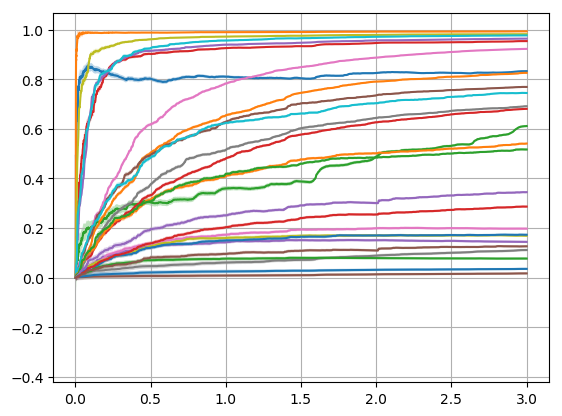

In [6]:
for k = 1:size(μ_θ_mem,2)
    plt.plot(t[bufsize:end], μ_θ_mem[bufsize:end,k])
    plt.fill_between(t[bufsize:end], μ_θ_mem[bufsize:end,k].+sqrt.(Σ_θ_mem[bufsize:end,k]), μ_θ_mem[bufsize:end,k].-sqrt.(Σ_θ_mem[bufsize:end,k]), alpha=0.3)
end
plt.grid()

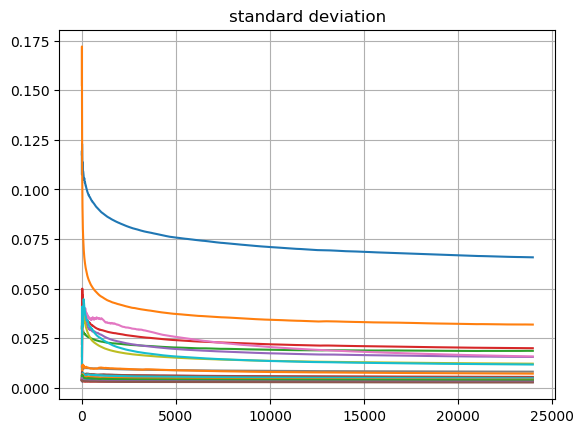

(nothing, PyObject Text(0.5, 1.0, 'standard deviation'))

In [7]:
plt.plot(1 ./ sqrt.(m_γ_mem[bufsize:end,:]))
plt.grid(), plt.title("standard deviation")

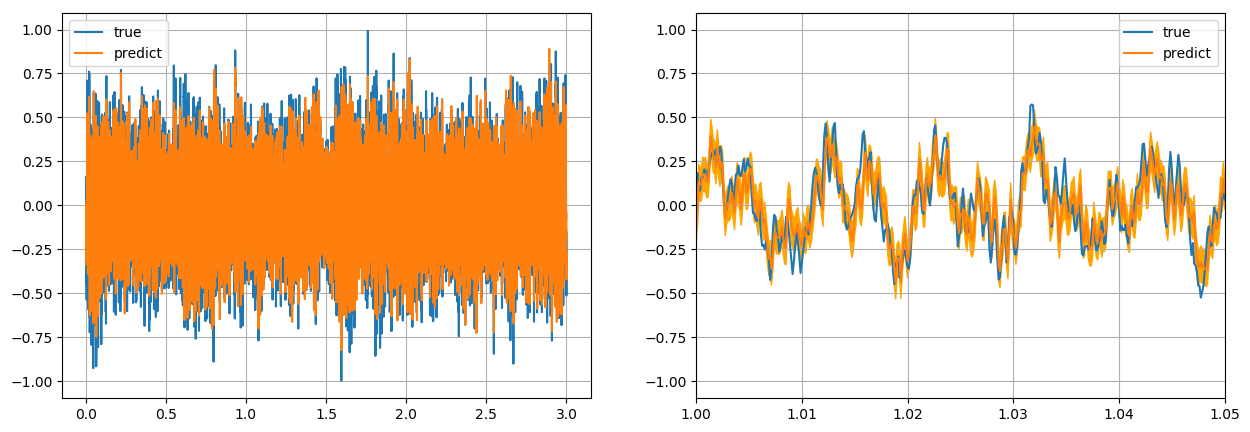

(nothing, PyObject <matplotlib.legend.Legend object at 0x000000000247F978>, (1.0, 1.05))

In [8]:
_, ax = plt.subplots(ncols=2, figsize=(15,5))
ax[1].plot(t[bufsize:end], yi[bufsize:end], label="true")
ax[1].plot(t[bufsize:end], μ_x_mem[bufsize:end], label="predict")
ax[1].grid(), ax[1].legend()
ax[2].plot(t[bufsize:end], yi[bufsize:end], label="true")
ax[2].plot(t[bufsize:end], μ_x_mem[bufsize:end], label="predict")
ax[2].fill_between(t[bufsize:end], μ_x_mem[bufsize:end] .+ sqrt.(Σ_x_mem[bufsize:end]), μ_x_mem[bufsize:end] .- sqrt.(Σ_x_mem[bufsize:end]), color="orange")
ax[2].grid(), ax[2].legend(), ax[2].set_xlim(1.0,1.05)

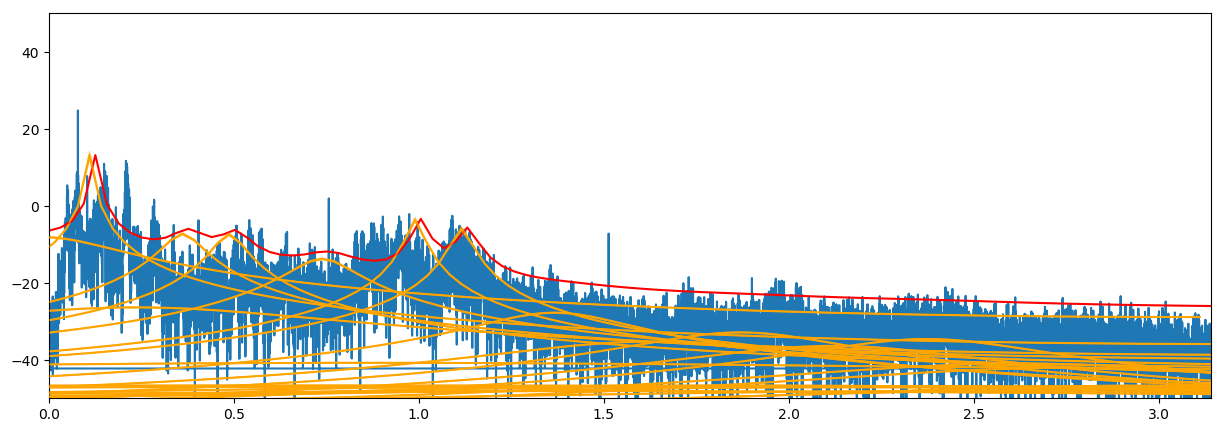

(0, 3.141592653589793)

In [9]:
plt.figure(figsize=(15,5))

plt.plot(FFTW.fftfreq(length(yi), fs)/fs*2*pi, 10*log10.((abs.(FFTW.fft(yi)).^2)./length(yi)))

tmp_psd = zeros(101)
for k = 1:length(f)
    θ_sampled, γ_sampled = AR_distributions([μ_θ_mem[end,k]], mat(1/Σ_θ_mem[end,k]), a_γ[k], b_γ[k])
    mean_psd, std_psd = summary_psd(θ_sampled, γ_sampled)
    mean_psd = vcat(reverse(mean_psd), mean_psd[2:end])
    std_psd = vcat(reverse(std_psd), std_psd[2:end])
    θx = collect(0:length(mean_psd)-1)/length(mean_psd)*2*pi .- pi .+ 2*pi*f[k]/fs
    gca().plot(θx, mean_psd, color="orange", label="predicted psd")
    gca().fill_between(θx, mean_psd .- std_psd, mean_psd .+ std_psd, color="orange", alpha=0.5, zorder=100)
    tmp_psd = tmp_psd + 10 .^(mean_psd[101-Int(round(f[k]/fs*200)):201-Int(round(f[k]/fs*200))]/10)
end
gca().plot(collect(0:100)/100*pi, 10*log10.(tmp_psd), color="red")
plt.ylim(-50,50)
plt.xlim(0,pi)

## Predictive performance

In [10]:
x_true = yi[bufsize:end]
x_μ_pred = μ_x_mem[bufsize:end]
x_σ_pred = sqrt.(abs.(Σ_x_mem[bufsize:end]));

In [11]:
MSE = mean(abs2.(x_true - x_μ_pred))
MAE = mean(abs.(x_true - x_μ_pred))
BME = mean([logpdf(Normal(x_μ_pred[k], x_σ_pred[k]), x_true[k]) for k = 1:length(x_true)])

MSE, MAE, BME

(0.01670180214303869, 0.10288892877035576, 0.45749471513745127)